# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.shape

(4612, 15)

In [ ]:
df.info() # Show info data of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df.nunique() # Count numbers of unique values

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Checking missing values and duplicated rows**

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2) #Checking if exist missing values in the dataset

ID                       0.0
age                      0.0
current_occupation       0.0
first_interaction        0.0
profile_completed        0.0
website_visits           0.0
time_spent_on_website    0.0
page_views_per_visit     0.0
last_activity            0.0
print_media_type1        0.0
print_media_type2        0.0
digital_media            0.0
educational_channels     0.0
referral                 0.0
status                   0.0
dtype: float64

In [ ]:
df.duplicated().sum() #checking duplicated rows

0

**Dropping column**

In [ ]:
df.drop(columns=['ID'],inplace=True) # drop ID column

**Observation:**

As ID column won't give as significant information for analysis, we drop it.

**Separating numerical data and categorical data**

In [ ]:
num_cols = [] # numerical list
cat_cols = [] # categorical list

for i in df.columns: # iterate in dataframe columns

    if i != 'status': # condition to not add status target variable
        if df[i].dtypes == ('int64'): # if value is dtype int64, add to num_cols
            num_cols.append(i)

        elif df[i].dtypes == ('float64'): # else if value is dtype float, add to num_cols
            num_cols.append(i)

        elif df[i].dtypes == ('object'): # else if value is object, add to cat_cols
            cat_cols.append(i)

    if i == 'status':
        cat_cols.append(i)

In [ ]:
print(num_cols)
print(cat_cols)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']


In [ ]:
for column in cat_cols:
    df[column]=df[column].astype('category') # change dtype of categorical variables for "category". it helps saving memory

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

## EDA

- It is a good idea to explore the data once again after manipulating it.

**Problem definition:**

With the data and variables we try to analyze the data to see patterns within the variables and to create a model able to predict if a lead will become a paid customer

In [ ]:
df['status'].value_counts() # Counts values of target variable.

0    3235
1    1377
Name: status, dtype: int64

**OBSERVATIONS**

- 70% corresponds to leads with status 0 ('No').
- 30% for paid customers (1, 'Yes').

We can see a clear imbalance in data.

In [ ]:
df.describe().T # Get statistical information

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**OBSERVATIONS**

- The average age of leads is 46.
- In average, leads visits the website 3.5 times.
- The time spent on website is 724 seconds. 12 minutes approximately
- The average page views per visit is 3. The max pages visited is 18.

### **UNIVARIATE ANALYSIS**

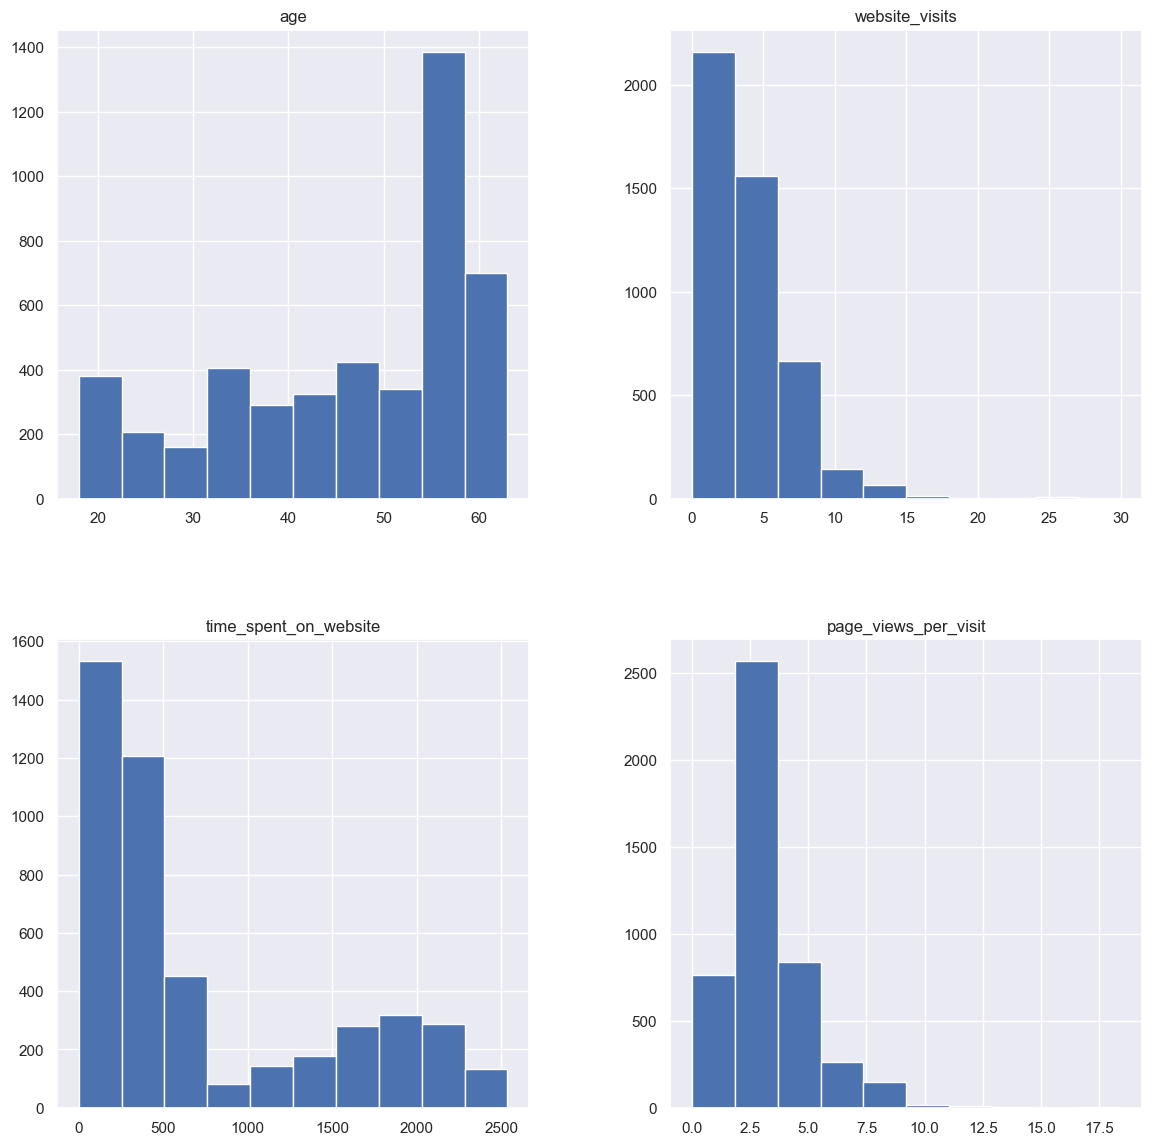

In [ ]:
df[num_cols].hist(figsize=(14,14)) # plot every numerical variable
plt.show()

In [ ]:
def uni_analysis (data,feature,figsize = (15,10),kde=True): # Define function
    f,(ax_box,ax_hist) = plt.subplots(nrows=2,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},  # Create subplots with parameters
        figsize=figsize)
    sns.boxplot(data=data,x=feature,ax=ax_box,showmeans=True) # Set boxplot and parameters
    sns.histplot(data=data,x=feature,ax=ax_hist,kde=kde)  # Set histplot and parameters
    ax_hist.axvline(data[feature].mean(),color="green",linestyle="--") # Create mean line
    ax_hist.axvline(data[feature].median(),color="red") # Create median line

**AGE**

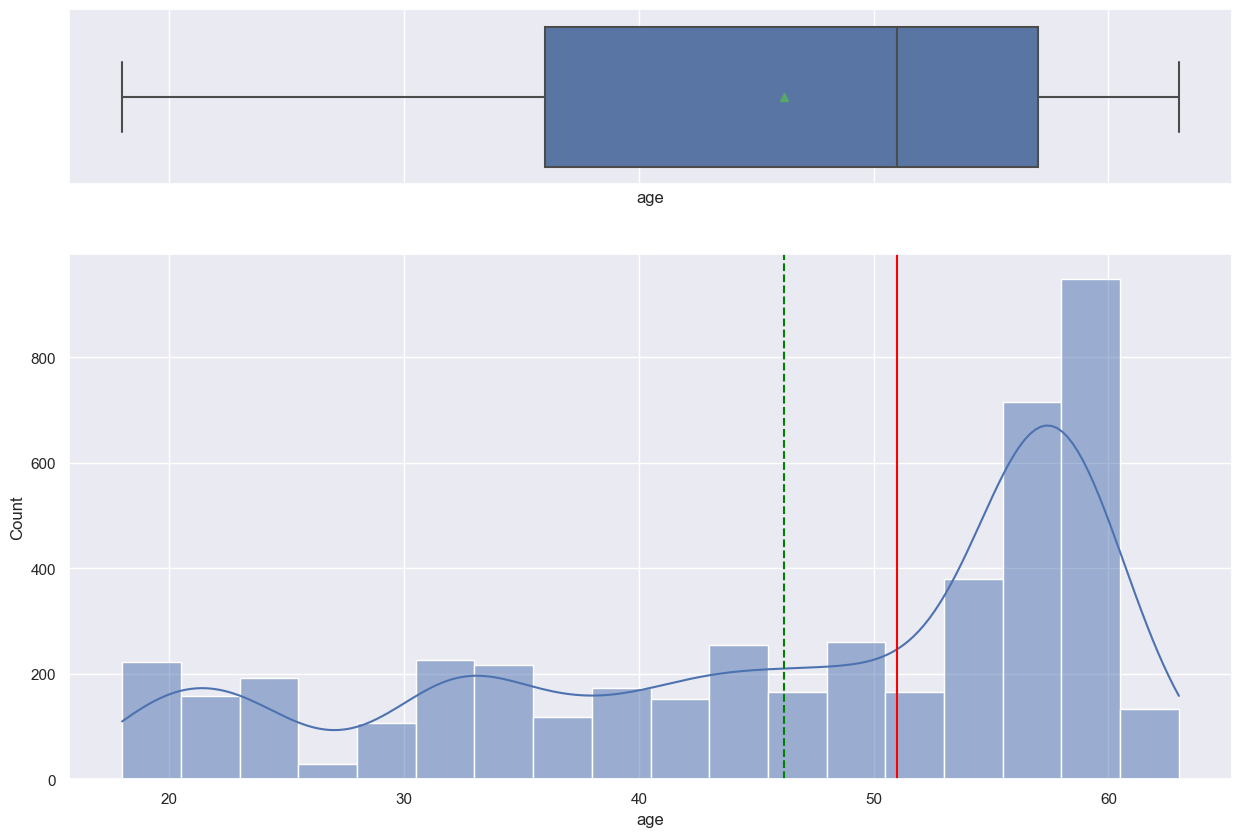

In [ ]:
uni_analysis(df,'age')

In [ ]:
df['age'].value_counts()

57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
51     88
54     88
49     87
21     86
50     85
46     85
23     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
18     66
35     66
40     63
37     60
38     58
36     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: age, dtype: int64

**OBSERVATIONS**

- Distribution is left-skewed
- Data shows greater ages are the most common in the dataset.

**WEBSITE_VISITS**

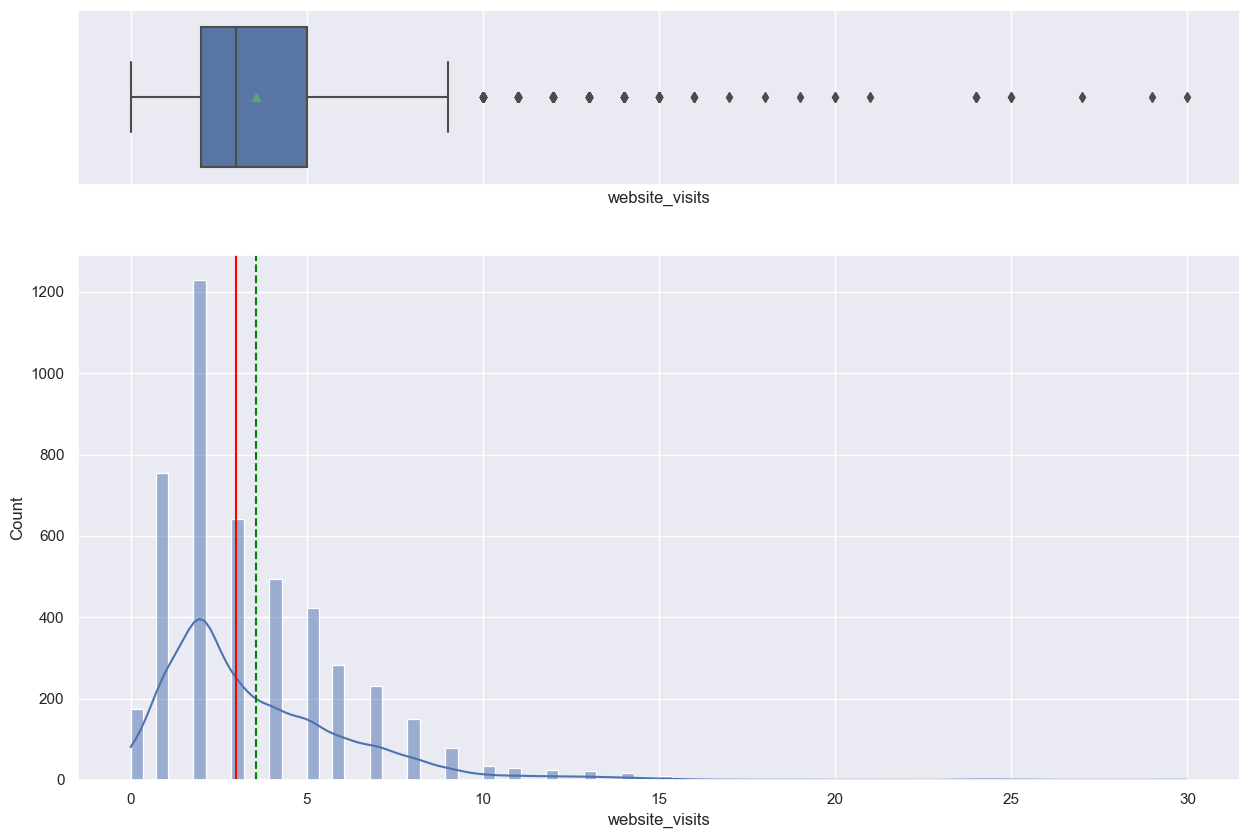

In [ ]:
uni_analysis (df,'website_visits') # use created function to show boxplot and histogram

In [ ]:
wv_outliers = df['website_visits'] > 9 # Get values greater than 9
wv_outliers.value_counts() # count those values

False    4458
True      154
Name: website_visits, dtype: int64

In [ ]:
df['website_visits'].value_counts()

2     1229
1      755
3      641
4      494
5      422
6      282
7      232
0      174
8      151
9       78
10      34
11      29
12      25
13      23
14      17
15       9
24       3
16       3
25       2
20       2
30       1
18       1
27       1
21       1
17       1
19       1
29       1
Name: website_visits, dtype: int64

**OBSERVATIONS**

- The distribution is right skewed
- For website_visits we have 154 outliers
- The average numbers of website visits is around 2 and 5

**TIME_SPENT_ON_WEBSITE**

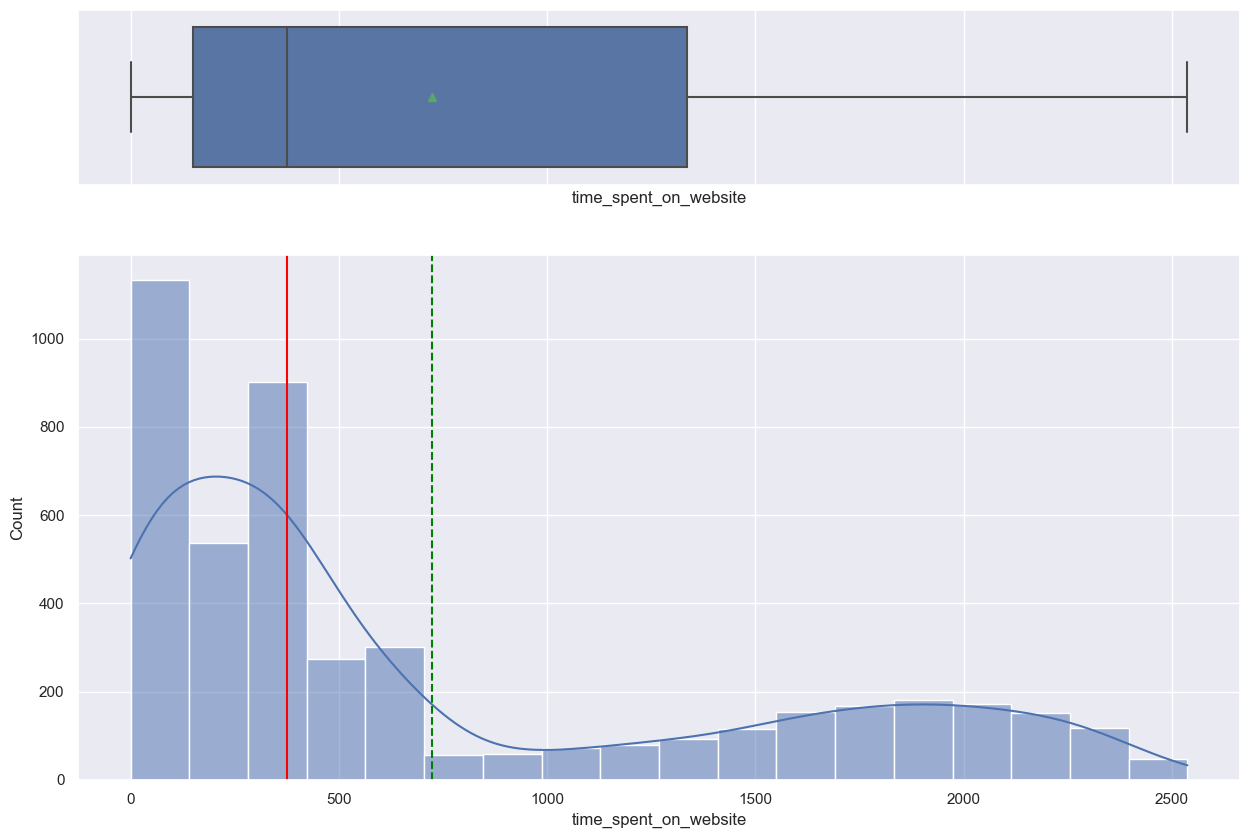

In [ ]:
uni_analysis (df,'time_spent_on_website') # use created function to show boxplot and histogram

**OBSERVATIONS**

- Distribution is right-skewed
- We can see that there are a few leads that spent a good amount of time on website.

**PAGE_VIEWS_PER_VISIT**

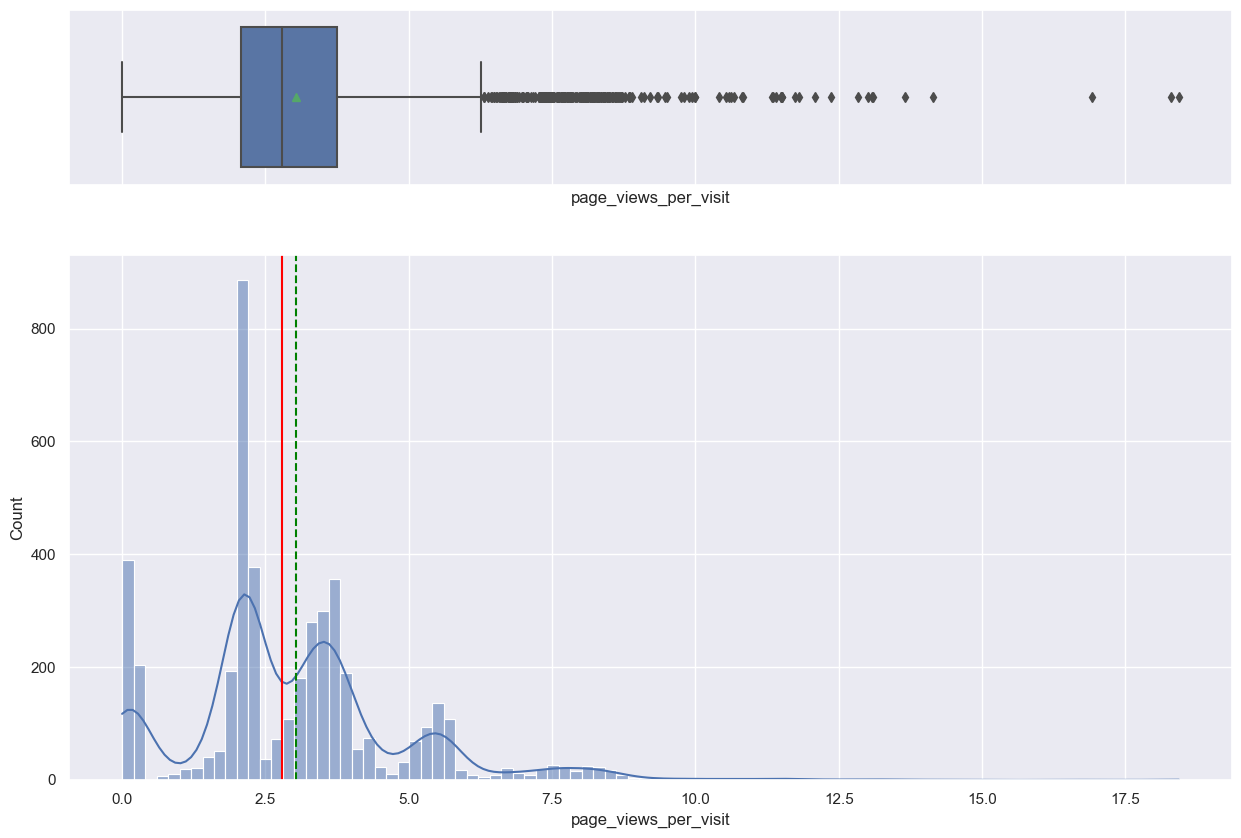

In [ ]:
uni_analysis (df,'page_views_per_visit') # use created function to show boxplot and histogram

In [ ]:
pw_outliers = df['page_views_per_visit'] > 6
pw_outliers.value_counts()

False    4344
True      268
Name: page_views_per_visit, dtype: int64

**OBSERVATIONS**

- For page_views_per_visit exist 268 outliers
- The data is concentrated  between 2 and 5

**UNIVARIATE NUMERICAL VARIABLES OBSERVATIONS**

- Although there are all ages, there is a greater number of potential customers who are older. Ages from 45 to 60.
- Leads tend to visit the website no more than 5 times, excepting extreme values, that can visit even 30 times.
- The average time spent on website variate around 6 minutes up to 16 minutes.
- The largest number of leads see around 3 pages on the website.

**UNIVARIATE CATEGORICAL VARIABLES ANALYSIS**

In [ ]:
for column in cat_cols: # iterate thru cat_cols list
    print(df[column].value_counts(normalize=False)*100) # for each value on list, print their df column
    print('-'*50)

Professional    261600
Unemployed      144100
Student          55500
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       254200
Mobile App    207000
Name: first_interaction, dtype: int64
--------------------------------------------------
High      226400
Medium    224100
Low        10700
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      227800
Phone Activity      123400
Website Activity    110000
Name: last_activity, dtype: int64
--------------------------------------------------
No     411500
Yes     49700
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     437900
Yes     23300
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     408500
Yes     52700
Name: digital_media, dtype: int64
--------------------------------------------------
No     390700
Yes     70500
Name: educational_channels, d

<Axes: xlabel='current_occupation', ylabel='count'>

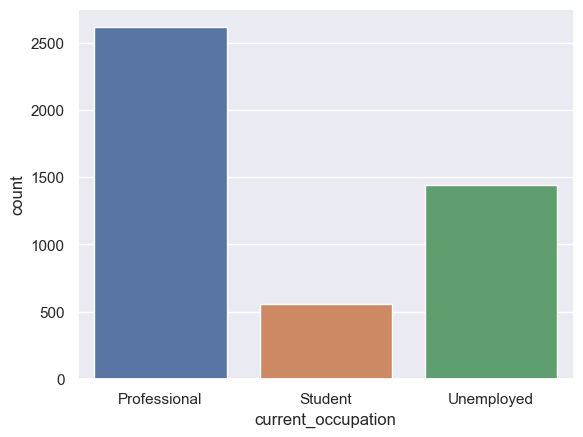

In [ ]:
sns.countplot(data=df,x='current_occupation') # Show countplot of current_occupation

In [ ]:
df['current_occupation'].value_counts(normalize=True)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64

- Professional occupation predominates, followed by unemployed leads and students

<Axes: xlabel='first_interaction', ylabel='count'>

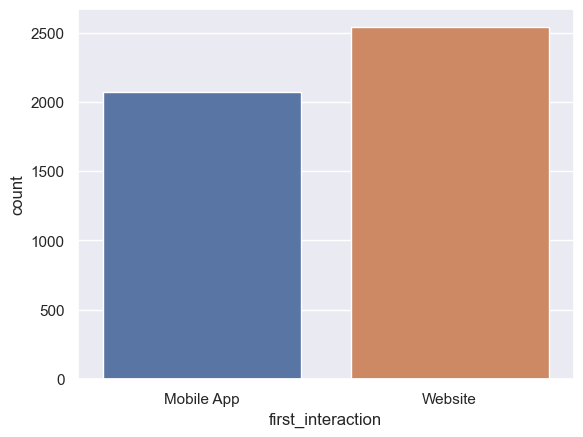

In [ ]:
sns.countplot(data=df,x='first_interaction') # Show countplot of first_interaction

In [ ]:
df['first_interaction'].value_counts(normalize=True) # Count values for variable first_interaction. show values as percentage

Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64

- The first interaction on Website is 9% greater than Mobile App first interaction. Not showing for now great difference.

<Axes: xlabel='profile_completed', ylabel='count'>

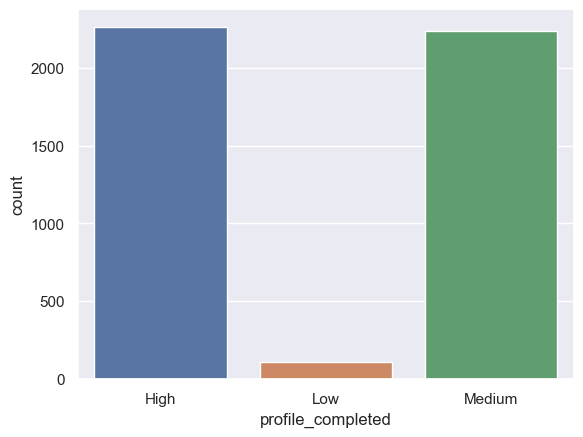

In [ ]:
sns.countplot(data=df,x='profile_completed')  # Show countplot of profile_completed

In [ ]:
df['profile_completed'].value_counts() # count values

High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64

- Is a high number of leads with profile completed  "high" (2264) as well Medium (2241) completed profile, low profile completed only have 107 leads with that profile

<Axes: xlabel='last_activity', ylabel='count'>

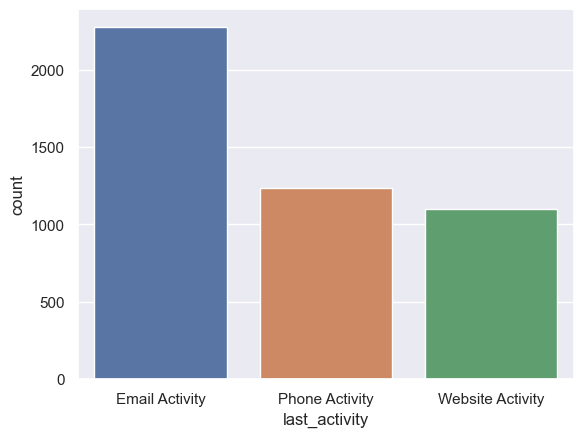

In [ ]:
sns.countplot(data=df,x='last_activity') # Show countplot of last_activity

- Interaction by email is the most common around leads, followed by phone interaction and website interaction.

<Axes: xlabel='print_media_type1', ylabel='count'>

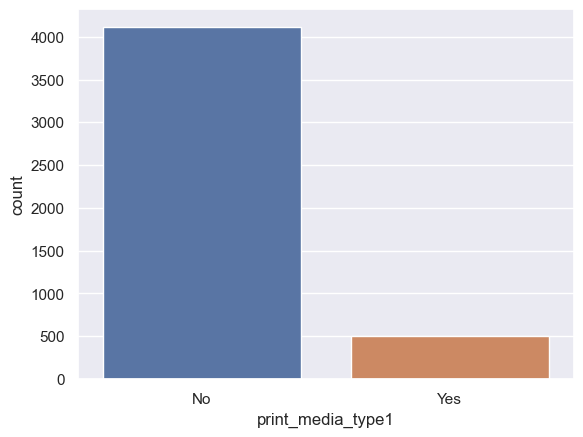

In [ ]:
sns.countplot(data=df,x='print_media_type1') # Show countplot of print_media_type1

In [ ]:
df['print_media_type1'].value_counts() # count values of variable

No     4115
Yes     497
Name: print_media_type1, dtype: int64

- 11% has seen ExtraLearn ad in the newspaper

<Axes: xlabel='print_media_type2', ylabel='count'>

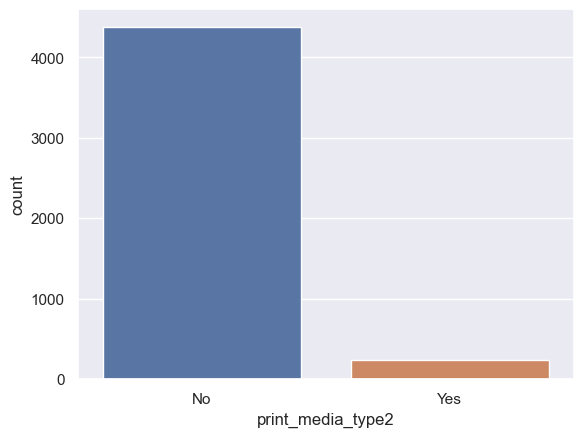

In [ ]:
sns.countplot(data=df,x='print_media_type2') # Show countplot of print_media_type2

In [ ]:
df['print_media_type2'].value_counts() # count values of variable

No     4379
Yes     233
Name: print_media_type2, dtype: int64

- Only 5% has seen ExtraLearn ad in the Magazine

<Axes: xlabel='digital_media', ylabel='count'>

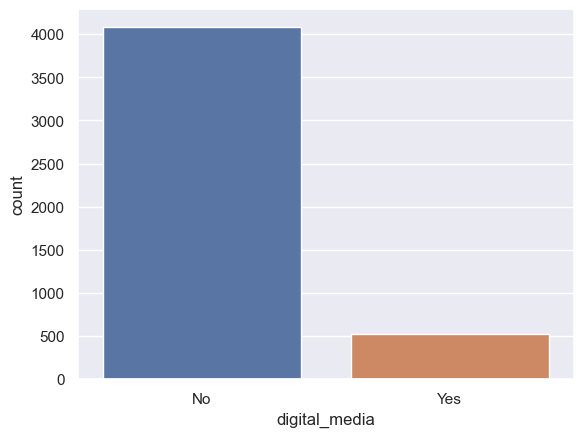

In [ ]:
sns.countplot(data=df,x='digital_media') # Show countplot of digital_media

In [ ]:
df['digital_media'].value_counts() # count values of variable

No     4085
Yes     527
Name: digital_media, dtype: int64

- 11% has seen ExtraLearn ad on digital platforms

<Axes: xlabel='educational_channels', ylabel='count'>

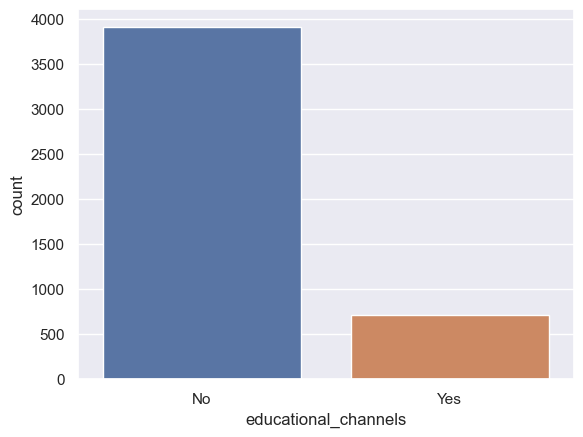

In [ ]:
sns.countplot(data=df,x='educational_channels') # Show countplot of educational_channels

In [ ]:
df['educational_channels'].value_counts() # count values of educational_channels

No     3907
Yes     705
Name: educational_channels, dtype: int64

- 15% has seen ExtraLearn ad in the newspaper

<Axes: xlabel='referral', ylabel='count'>

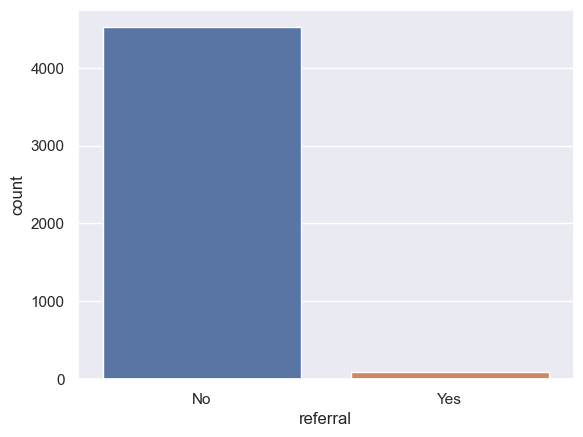

In [ ]:
sns.countplot(data=df,x='referral') # Show countplot of referral

In [ ]:
df['referral'].value_counts() # count values of variable

No     4519
Yes      93
Name: referral, dtype: int64

- Only 93 people have been referral by another lead or paid customer.

<Axes: xlabel='status', ylabel='count'>

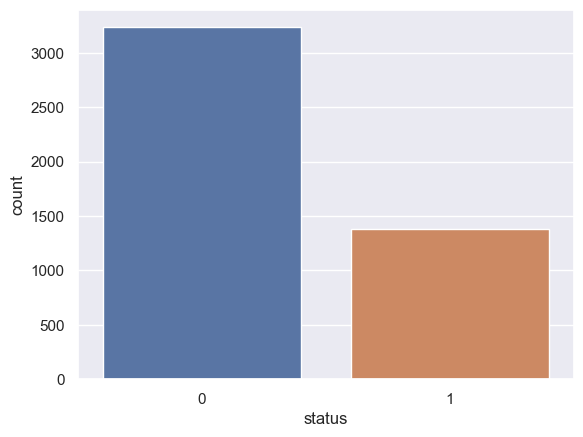

In [ ]:
sns.countplot(data=df,x='status') # Show countplot of status

In [ ]:
df['status'].value_counts() # count values of status

0    3235
1    1377
Name: status, dtype: int64

- only 30% has become a paid customer

**UNIVARIATE CATEGORICAL VARIABLES OBSERVATIONS**

- The majority of leads is professional, followed by unemployed and students.
- There is a small difference between first interaction on website and mobile
- Exist a small number of leads with the profile completed on low but high number of leads with profile completed on high and medium.
- Low percentage of leads have seen the ad of ExtraLearn on different channels. Educational Channels is were people have seen about ExtraLearn the most
- Only 93 people have been referral

### **Bivariate analysis**

In [ ]:
def bi_bar(data,cat,num,figsize=(10,5)): # create function that plot a barplot to speed process
    sns.barplot(data=data,x=cat,y=num)

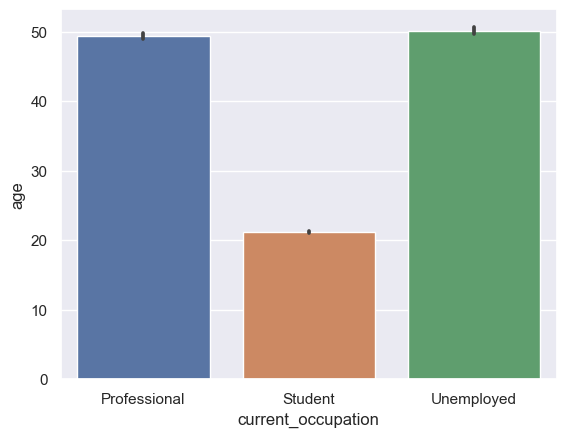

In [ ]:
bi_bar(df,'current_occupation','age')

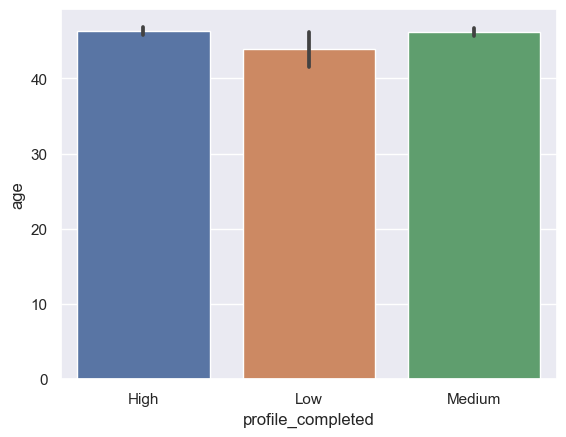

In [ ]:
bi_bar(df,'profile_completed','age')

- Does not seem to be a correlation between profile_completed and age

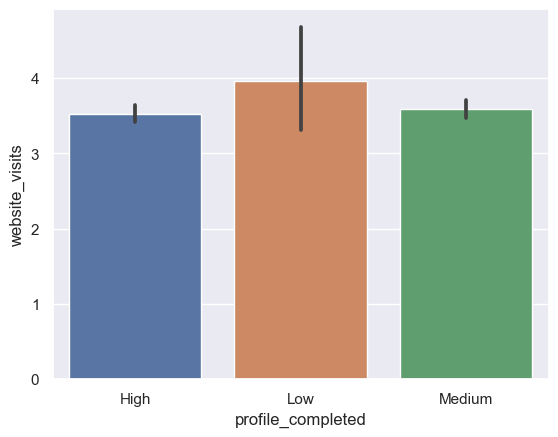

In [ ]:
bi_bar(df,'profile_completed','website_visits')

- Leads with profile_completed low visit more the website. Maybe they are hesitating whether to sign up or not

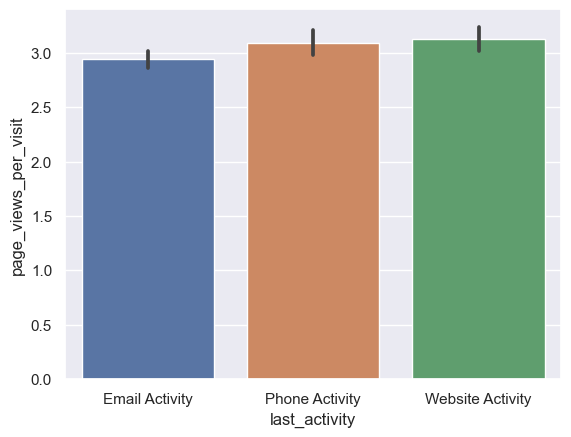

In [ ]:
bi_bar(df,'last_activity','page_views_per_visit')

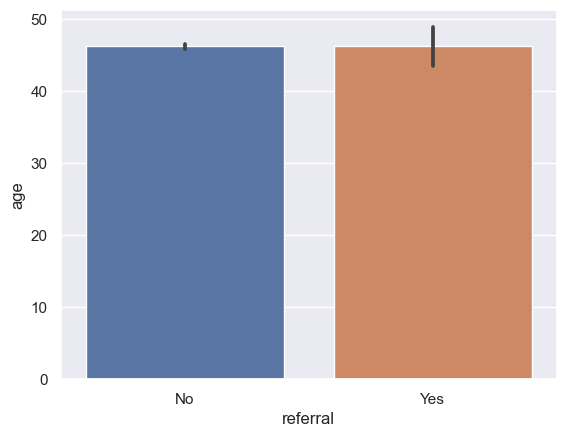

In [ ]:
bi_bar(df,'referral','age')

- There is 0 relation between been referral or not and age

In [ ]:
df.groupby(['status'])['current_occupation'].value_counts() # group by status and count values of current_occupation

status  current_occupation
0       Professional          1687
        Unemployed            1058
        Student                490
1       Professional           929
        Unemployed             383
        Student                 65
Name: current_occupation, dtype: int64

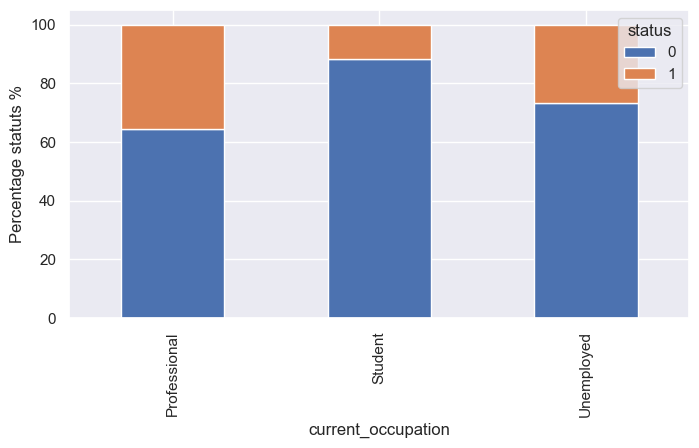

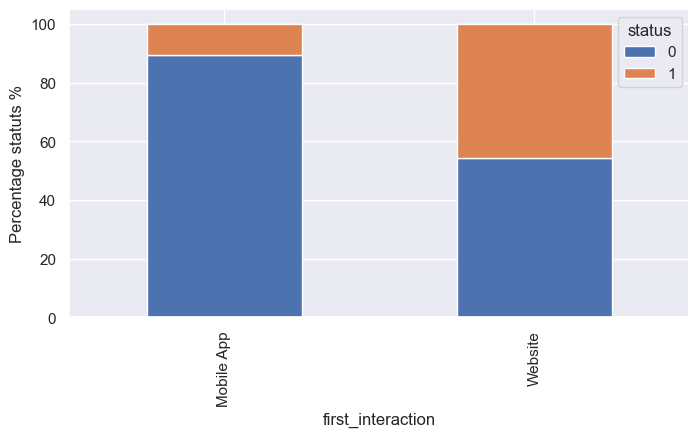

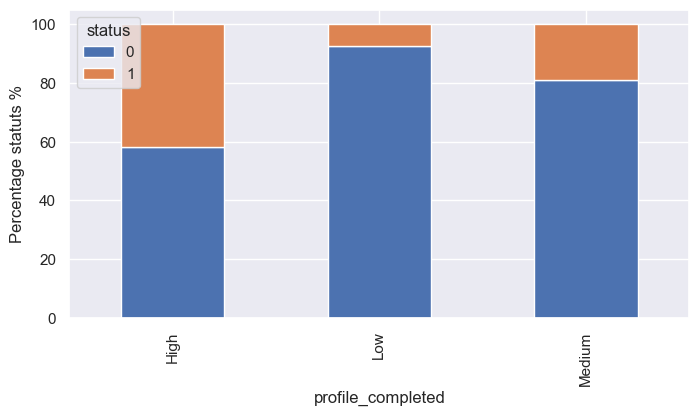

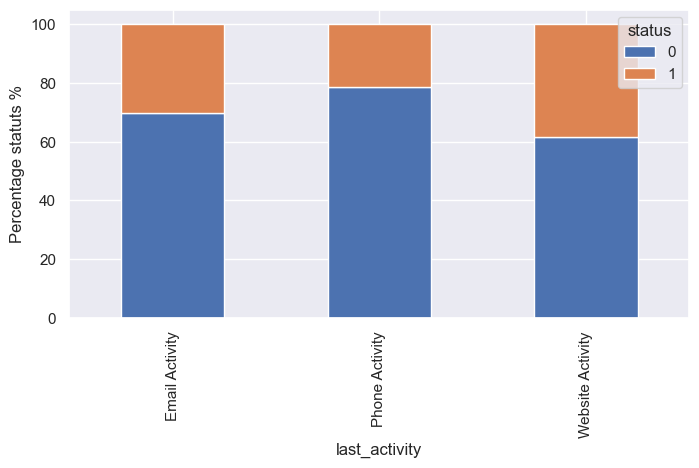

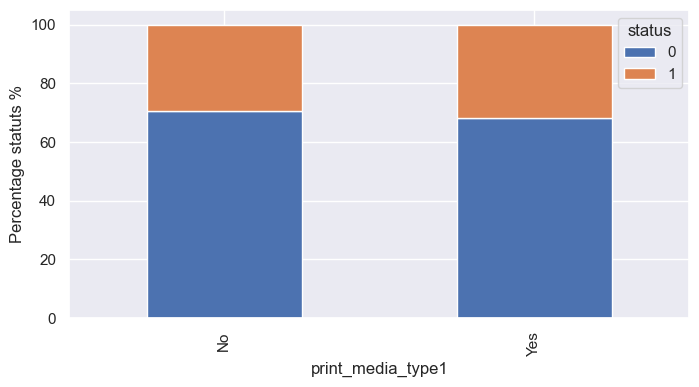

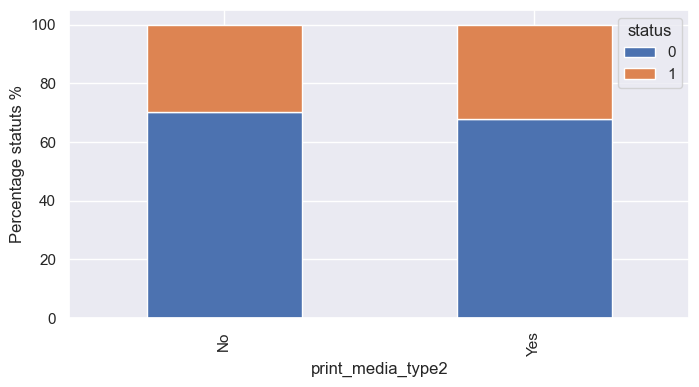

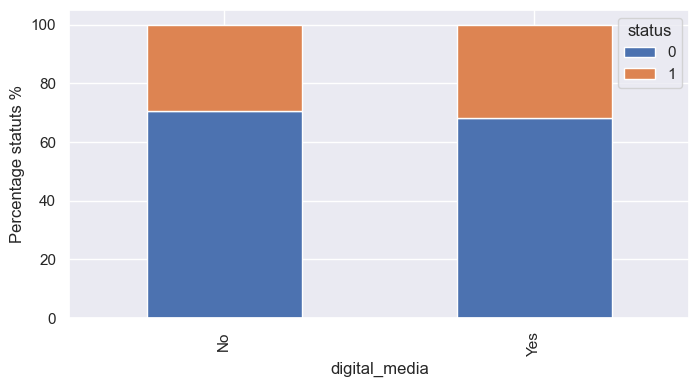

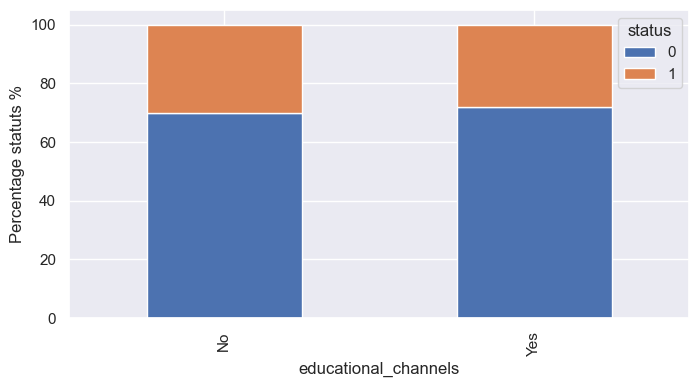

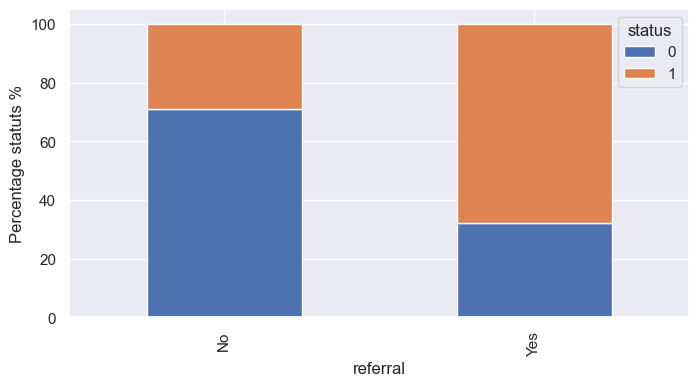

In [ ]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage statuts %')

Text(0, 0.5, 'Percentage statuts %')

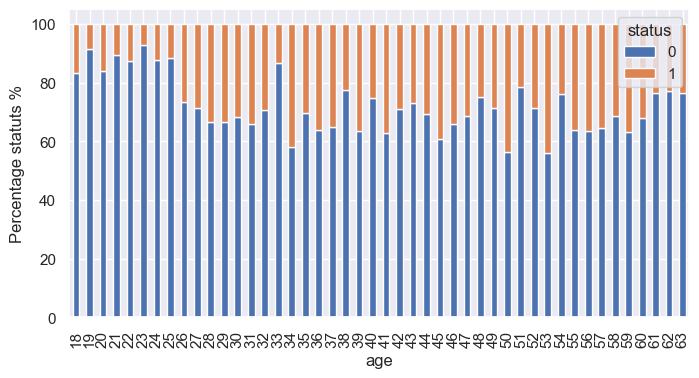

In [ ]:
(pd.crosstab(df['age'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage statuts %')

Text(0, 0.5, 'Percentage statuts %')

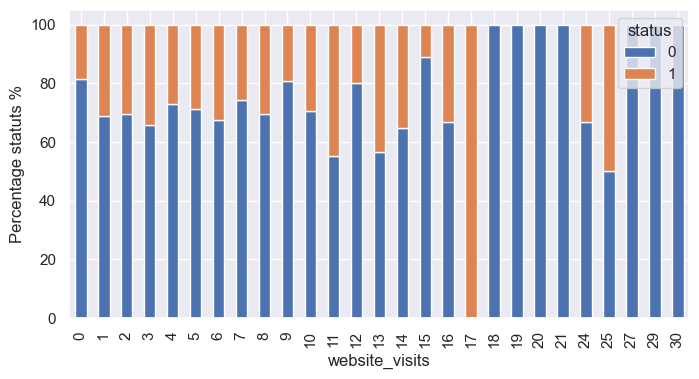

In [ ]:
(pd.crosstab(df['website_visits'],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage statuts %')

**OBSERVATIONS**

- Professionals are the most to become paid customers, followed by unemployed leads and students. Students having low conversion.
- Leads were their first interaction was Website have a much higher conversion compared to leads with mobile app as their first interaction.
- The higher the profile completed, higher the conversion rate to status 1. A profile completed high is significative greater on conversion rate.
- Website last activity have more conversion rate, followed close by email and last phone activity.
- There is almost no difference in conversion rate for people who did or did not see the ads on different channels.
- For referral, even is a small proportion of people, the conversion rate is really high.

In [ ]:
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


- Time_spent_on_website is almost double for leads with status 1 compared to status 0.

**Correlation heatmap**

<Axes: >

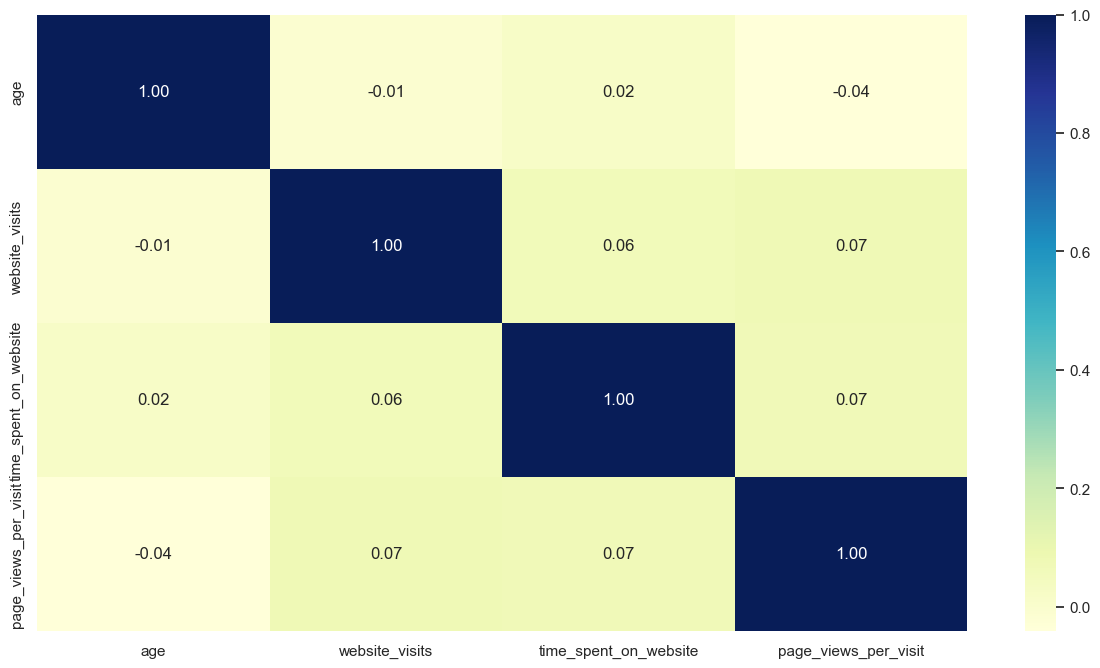

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu') # plot heatmap to see correlation between variables

**As we can see of the heatmap, there is not correlation between variables**

**QUESTIONS**



**1. Find out how current occupation affects lead status.**
- For leads who are professional, in base of the data, we can say they are the group of people that tend to convert to paid customer the most. This may be to increase their skills for their current job, change carreers or postulate to new charge. Unemployed leads have a great conversion rate too. Students have a low conversion rate.

**2. Do the first channels of interaction have an impact on the lead status?**

- Yes. Leads whos first interaction was on the website, have a higher conversion rate.


**3. Which way of interaction works best?**

- The best is website activity, followed close by email activity and the last is phone activity.

**4. Which of these channels have the highest lead conversion rate?**

- Referral have the highest lead conversion rate.

**5. Does having more details about a prospect increase the chances of conversion?**

- I don't think so. But, maybe knowing about the reason of why leads sign up, may be a good variable.

## **Data Preparation**

In [ ]:
X=df.drop(columns='status') # Dropping target variable
Y=df['status'] # Separating target variable

In [ ]:
# Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y) #set random_state 1 for reproducible results

In [ ]:
#creating list with dummy variables
dummy_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1',
              'print_media_type2','digital_media','educational_channels','referral']

X_train=pd.get_dummies(X_train, columns=dummy_cols, drop_first=True) # create train data
X_test=pd.get_dummies(X_test, columns=dummy_cols, drop_first=True) # create test data

In [ ]:
X_train

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,57,1,582,2.197,0,0,0,0,0,0,0,0,0,0,1,0
1162,35,2,1937,5.111,0,1,1,0,1,0,0,0,0,1,0,0
1057,53,5,1554,2.123,0,1,1,0,1,0,0,0,0,0,1,0
436,52,7,15,4.382,0,0,1,0,0,0,0,0,0,0,0,0
946,57,0,0,0.000,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,56,7,177,2.228,0,1,1,0,1,1,0,1,0,0,0,0
2615,54,1,1139,5.450,0,1,0,0,0,0,0,0,0,1,0,0
2441,47,2,1605,3.706,0,0,0,0,1,0,0,0,0,0,0,0
438,56,7,242,5.552,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
X_test

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
2362,24,2,1445,2.085,1,0,1,0,0,0,0,0,0,0,1,0
4206,19,3,562,2.212,1,0,1,0,1,0,1,0,0,0,0,0
2835,24,8,2114,6.808,1,0,1,0,1,1,0,0,0,0,0,0
4229,57,1,230,3.640,0,0,0,0,1,0,0,0,0,0,0,0
3006,37,5,365,3.889,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,53,2,338,2.059,0,1,1,0,0,0,1,0,0,0,0,0
760,38,2,61,3.741,0,1,1,0,1,0,0,0,0,1,0,0
4525,56,5,345,3.327,0,0,1,0,1,1,0,0,0,0,0,0
1859,57,3,416,0.112,0,0,1,0,0,0,1,0,0,0,0,0


## Model decision

Classification errors that may occur:

- Lead decide to become a paid customer but the model classify as it wont become a paid customer. **Cost of losing a customer** (false negative)
- Lead wont become a paid customer, but the model classify as it will become a paid customer. **Lost of resources** (false positive)

Even with ExtraLearn wanting to allocate resources efficiently, losing a real interested customer is a bigger lose for the company.

That being said, we will focus on minimize False Negatives (Value belongs to class 1, but it was predicted as 0). In order to minimize False Negatives, we will try to maximize the **Recall**.

Models for this problem:

- Logistic regression
- SVM
- Decision Tree
- Random forest

In [ ]:
# Creating metric function to run it multiple times in a faster way
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

## Logistic Regression

In [ ]:
lg = LogisticRegression() # Create Logistic regression Model
lg.fit(X_train,y_train) # Fitting model

LogisticRegression()

### Performance on training set

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2264
           1       0.73      0.63      0.67       964

    accuracy                           0.82      3228
   macro avg       0.79      0.76      0.77      3228
weighted avg       0.81      0.82      0.81      3228



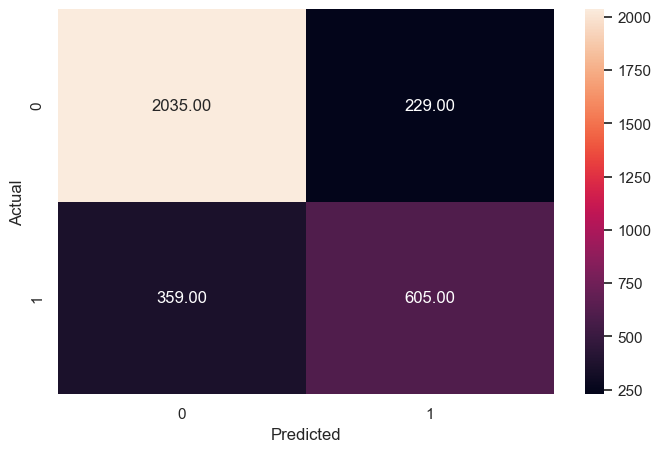

In [ ]:
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train) # Checking Performance on train data

### Performance on test set

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       971
           1       0.75      0.60      0.67       413

    accuracy                           0.82      1384
   macro avg       0.80      0.76      0.77      1384
weighted avg       0.82      0.82      0.82      1384



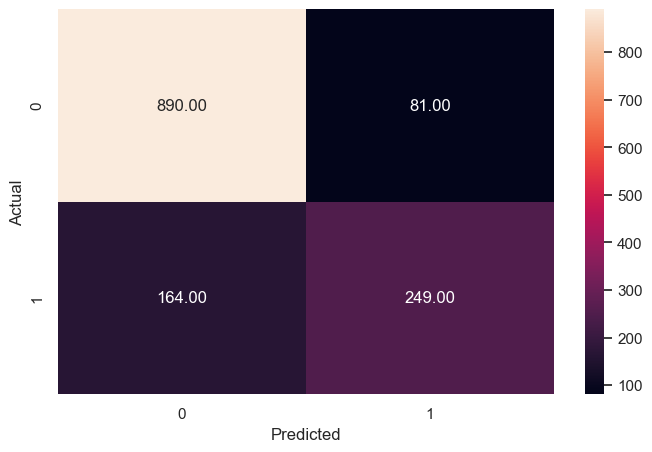

In [ ]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test) # Checking Performance on test data

**OBSERVATIONS**

- The model is performing well, but with low recall.

### Finding Optimal threshold for Logistic Regression

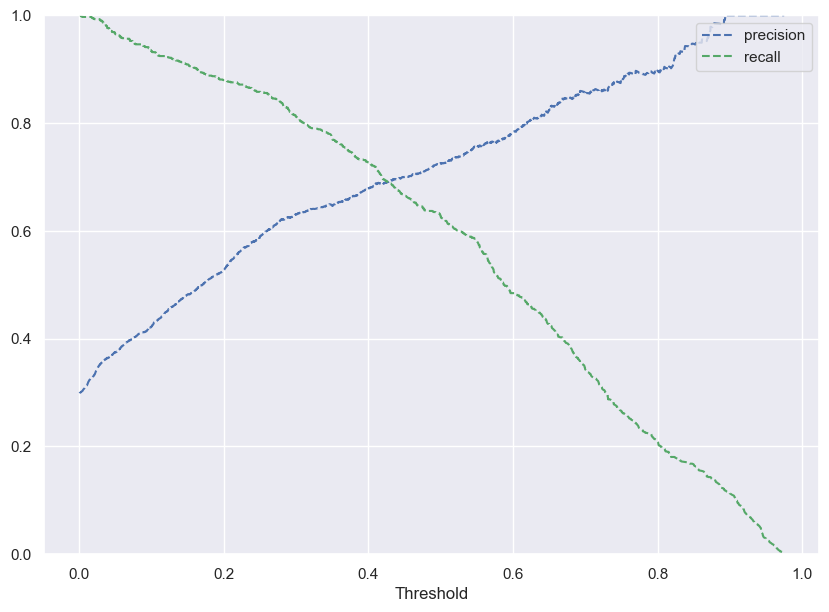

In [ ]:
y_scores_lg = lg.predict_proba(X_train) # use in built function predict_proba to get the probability

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1]) # create variables to plot

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

- Threshold will be 0.4

In [ ]:
optimal_threshold = 0.4 # Setting the optimal threshold

### Performance on train set

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2264
           1       0.68      0.73      0.70       964

    accuracy                           0.82      3228
   macro avg       0.78      0.79      0.78      3228
weighted avg       0.82      0.82      0.82      3228



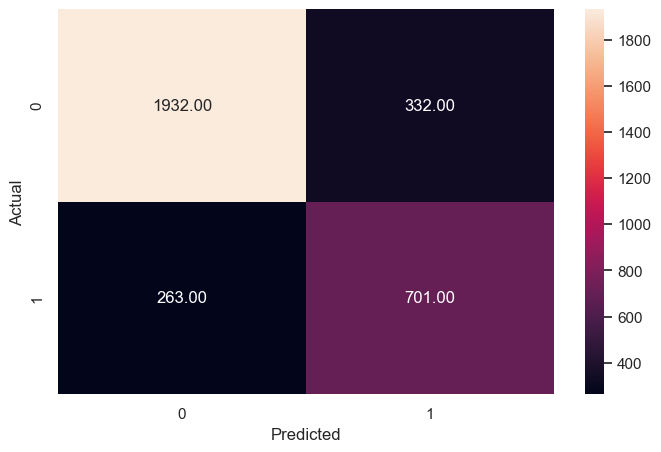

In [ ]:
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold) # checking performance on train set with a threshold of 0.4

- Recall has incresed 10%

### Performance on test set

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       971
           1       0.69      0.73      0.71       413

    accuracy                           0.82      1384
   macro avg       0.78      0.79      0.79      1384
weighted avg       0.82      0.82      0.82      1384



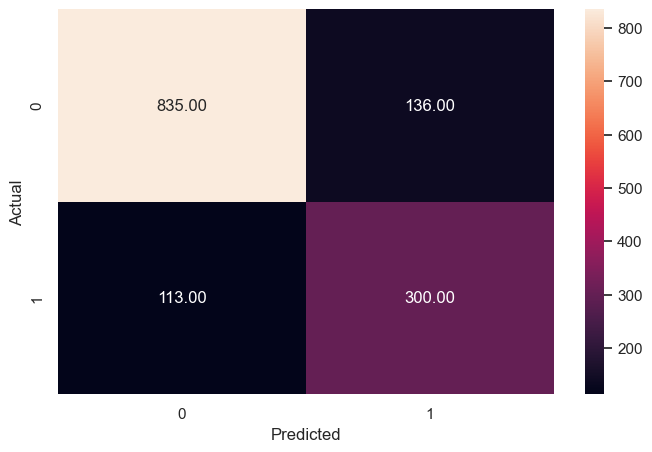

In [ ]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold) # checking performance on test set with a threshold of 0.4

The performance on the test is almost equal as the performance in the training set, with an increse on the recall of 13% for the test set.

The model is not good enough to be consider significant.

### Support Vector Machine (SVM)

### Scaling before applying svm model to improve performance and speed

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train) # creating varible scaling
X_train_scaled = scaling.transform(X_train) # scale train data
X_test_scaled = scaling.transform(X_test) # scale test data

### Linear Kernel

In [ ]:
svm = SVC(kernel='linear',probability=True) # Linear kernal
svm.fit(X= X_train_scaled, y = y_train) # fit the model

SVC(kernel='linear', probability=True)

### Train set

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2264
           1       0.72      0.68      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.78      0.79      3228
weighted avg       0.82      0.82      0.82      3228



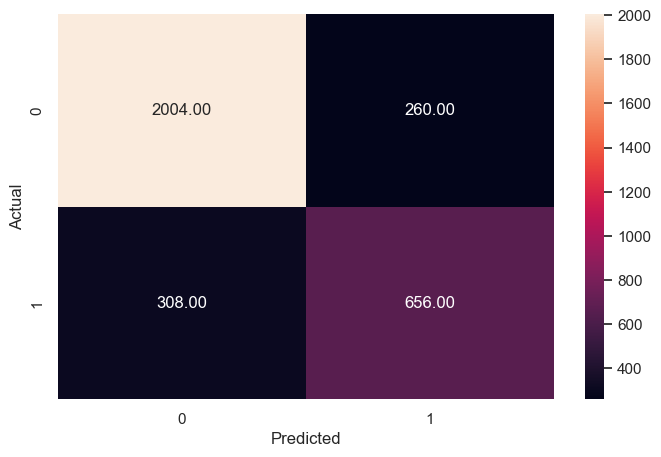

In [ ]:
y_pred_train_svm = svm.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm) # Checking performance

- The model performance has improve comparing it to the performance of train data on the lg model

### Test set

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.73      0.68      0.70       413

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



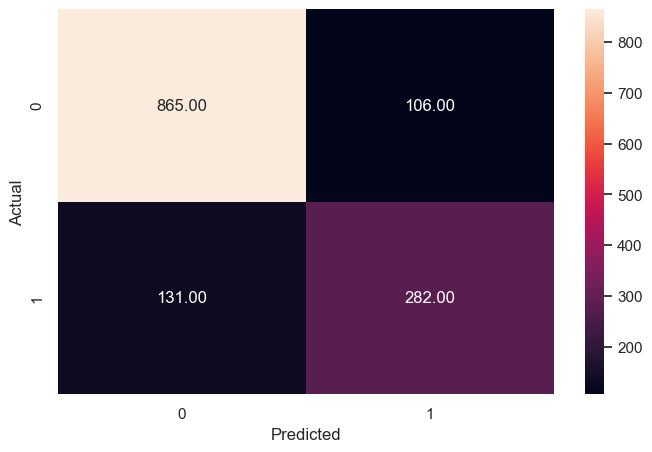

In [ ]:
y_pred_test_svm = svm.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm) # Checking performance on test set

- The performance of the model on the test data has improve compared to the training data.
- Recall could be improved
- is not better that lg model so far

### Finding optimal threshold for SVM model - Linear Kernel

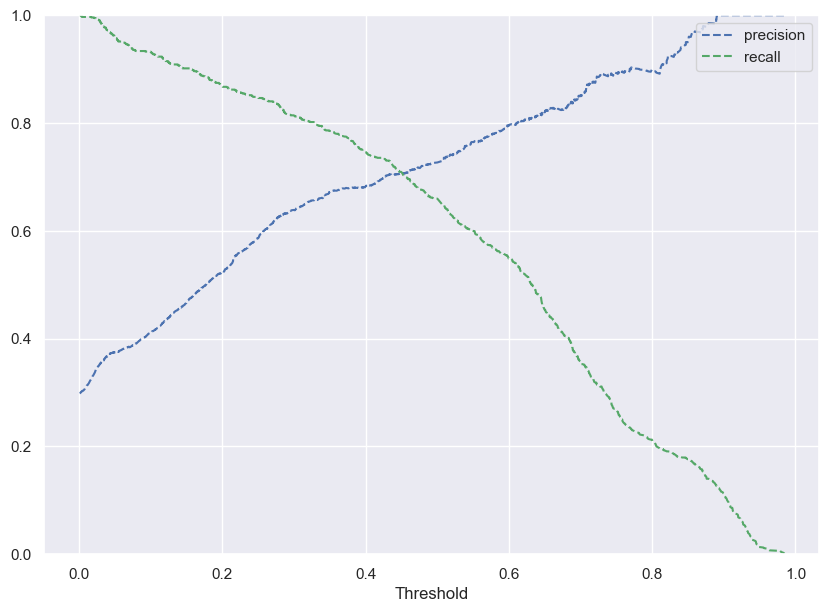

In [ ]:
# Predict on train scaled data
y_scores_svm = svm.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.45

### Checking SVM model performance using optimal threshold

### Train set

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2264
           1       0.71      0.71      0.71       964

    accuracy                           0.83      3228
   macro avg       0.79      0.79      0.79      3228
weighted avg       0.83      0.83      0.83      3228



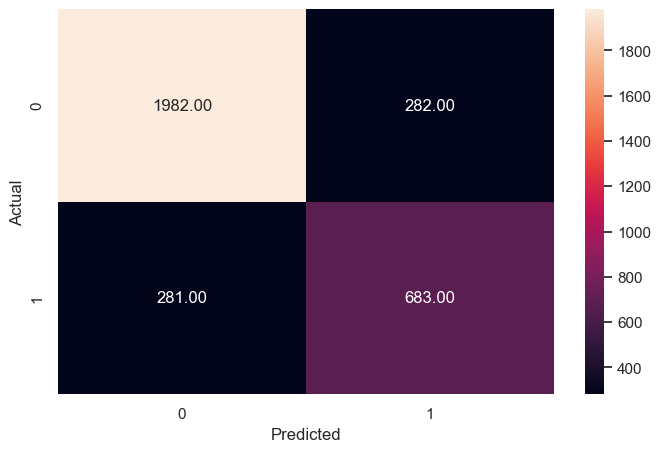

In [ ]:
y_pred_train_svm = svm.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm) #Checking Performance on train data

### Test set

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       971
           1       0.72      0.71      0.72       413

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



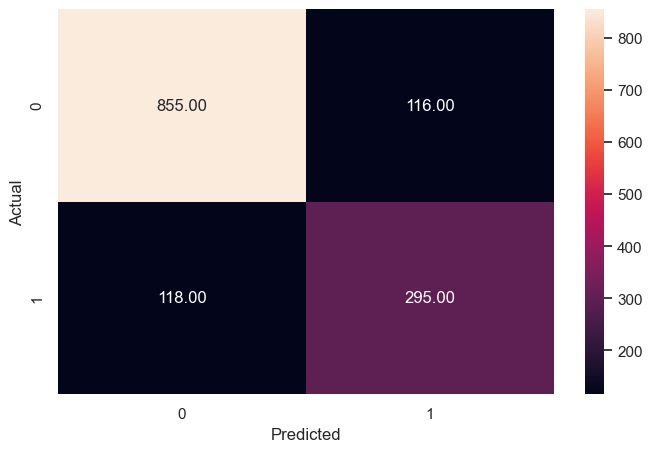

In [ ]:
y_pred_test_svm = svm.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test_svm[:,1]>optimal_threshold_svm)
# Checking Performance on test data

**OBSERVATIONS**

- The performance with a threshold set, has improved in comparison to the train set and lg model just by 3% for the recall.

### RBF Kernel

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True) # creating  RBF Kernel model
svm_rbf.fit(X_train_scaled,y_train) # Fitting the model

SVC(probability=True)

### Train set

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2264
           1       0.77      0.73      0.75       964

    accuracy                           0.86      3228
   macro avg       0.83      0.82      0.83      3228
weighted avg       0.85      0.86      0.86      3228



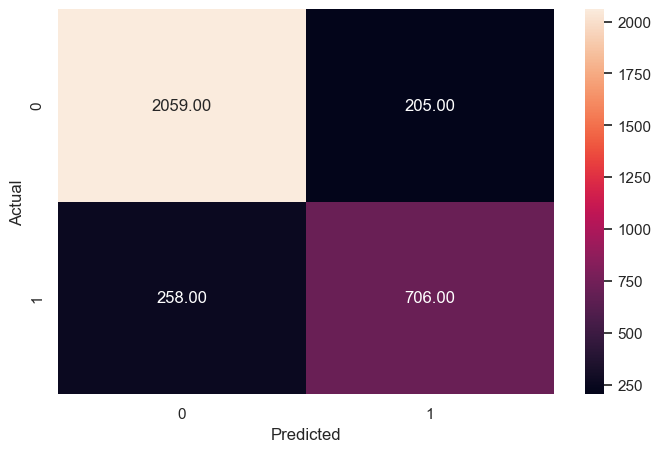

In [ ]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm) # Checking performance on train data

- Precision and recall increseaded compared to train data on linear kernel model

### Test set

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       971
           1       0.74      0.68      0.71       413

    accuracy                           0.84      1384
   macro avg       0.81      0.79      0.80      1384
weighted avg       0.83      0.84      0.83      1384



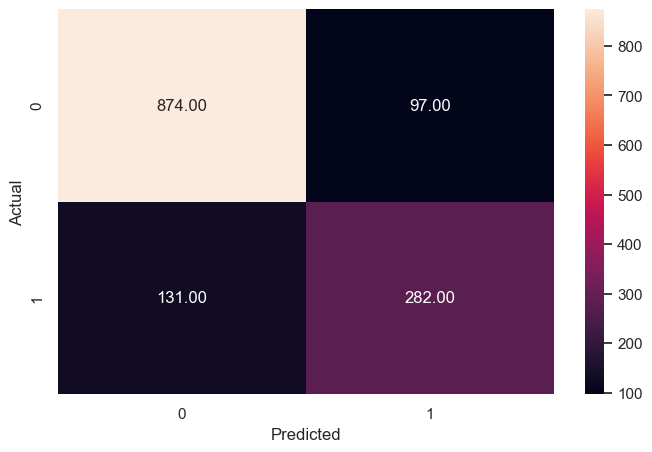

In [ ]:
y_pred_test_svm = svm_rbf.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm) #Checking Performance on test data

- Model just changed in 1% compared to test data on linear kernel model without threshold

### Finding optimal threshold for SVM model - RBF Kernel

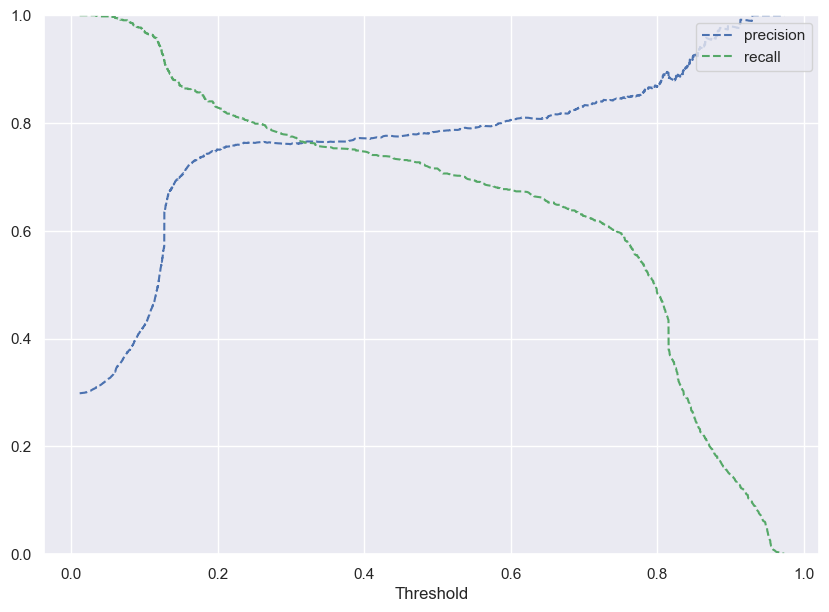

In [ ]:
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.22 # setting optimal threshold value

The optimal threshold is set to 0.22

- This decision mainly focus on improving recall sacrificing in a small proportion the precision. As precision between 0.2 and 0.3 shows a flat line, we can set the threshold to 0.22 to get the best optimal threshold.

### Checking SVM model performance using optimal threshold

### Train set

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2264
           1       0.76      0.81      0.79       964

    accuracy                           0.87      3228
   macro avg       0.84      0.85      0.84      3228
weighted avg       0.87      0.87      0.87      3228



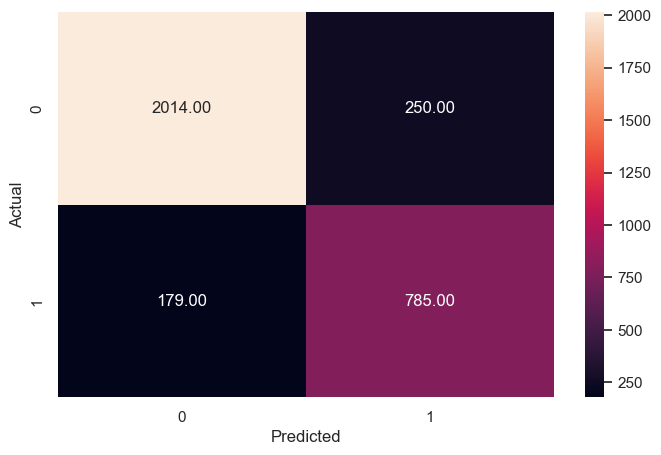

In [ ]:
y_pred_train_svm = svm_rbf.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm) # Checking performance on train set

### Test set

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       971
           1       0.71      0.76      0.74       413

    accuracy                           0.84      1384
   macro avg       0.80      0.82      0.81      1384
weighted avg       0.84      0.84      0.84      1384



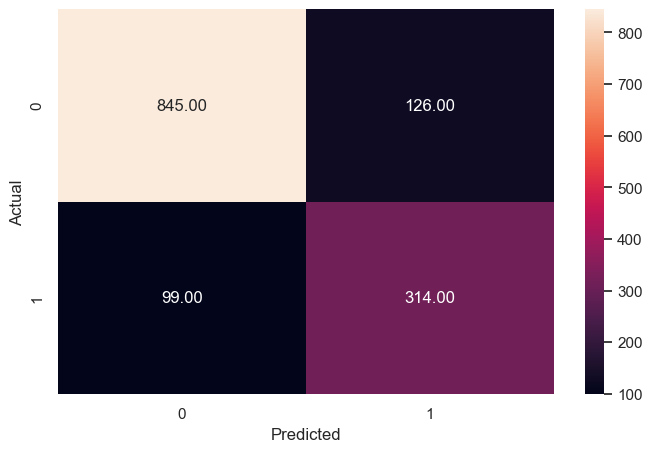

In [ ]:
y_pred_test_svm = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test,y_pred_test_svm[:,1] > optimal_threshold_svm) #Checking Performance on test set

**OBSERVATIONS**

- Model is performing well with an small difference from the traning set.
- The recall and precision have a good balance. Focusing more in recall for our problem.
- The recall has improved 9% compared to rbf without the optimal threshold.
-  The accuracy of the model and the rest is almost the same.
- Rbf kernel model is the best model compared to rest but not significant good enough.

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=1) # Creating decision tree model
dt.fit(X_train, y_train) # fitting model

DecisionTreeClassifier(random_state=1)

### Training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



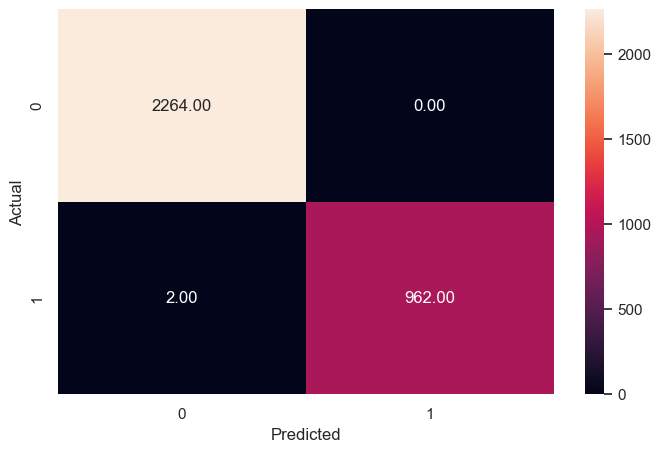

In [ ]:
pred_train_dt = dt.predict(X_train) # predict with train set
metrics_score(y_train, pred_train_dt) #Checking Performance on training set

- Model could be overfitting

### Test set

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



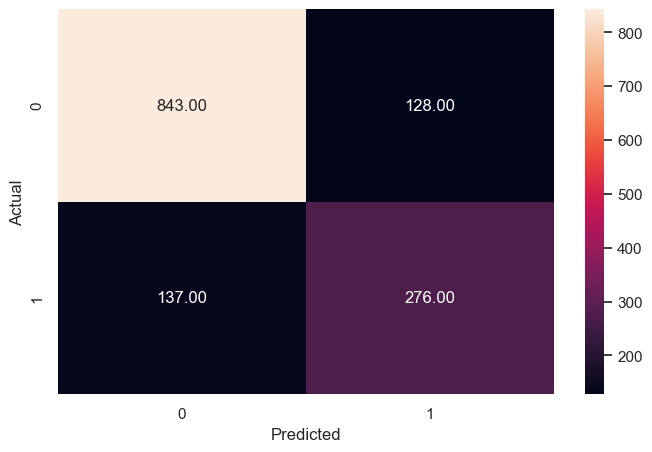

In [ ]:
pred_test_dt = dt.predict(X_test) # predict with test set
metrics_score(y_test, pred_test_dt)  # Checking performance on test set

 - Model clearly is overfitting

### Hyperparameter tuning using GridSearch CV

In [ ]:
estimator = DecisionTreeClassifier(random_state=1) # Creating new tuning estimator with decision tree classifier

# Parameters for gridsearchCV
parameters = {
    "max_depth": np.arange(2,7),
    "max_leaf_nodes": [30,50, 75],
    "min_samples_split": [10, 20,30, 50, 70],
    "criterion": ['entropy']
}

grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1) # Run GridSearchCV and assign it to variable
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_ # set tuned model with the best estimators

estimator.fit(X_train, y_train) # Fitting tuned model

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=30,
                       min_samples_split=10, random_state=1)

### Checking performance of decision tree after Hyperparameter tuning

### Training set

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



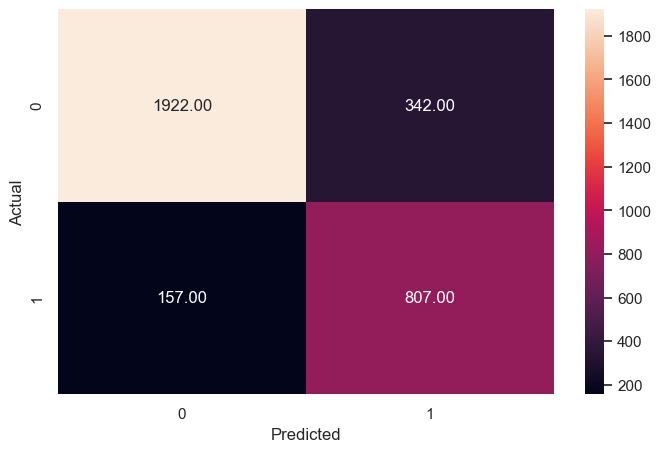

In [ ]:
dt_train_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_train_tuned) # Checking model performance on train set after hyperparameter tuning

### Test set

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



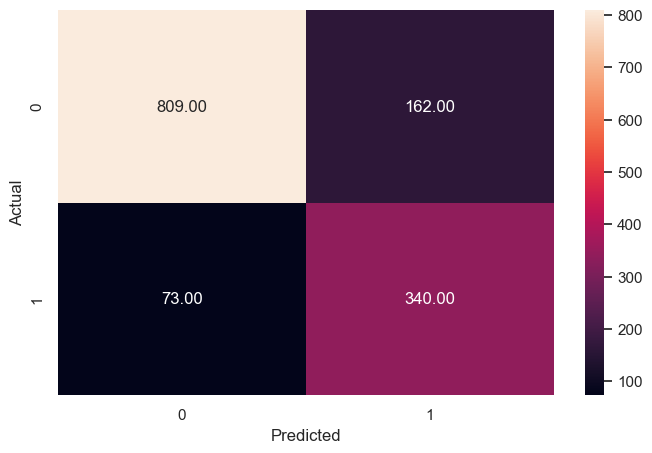

In [ ]:
dt_test_tuned = estimator.predict(X_test)
metrics_score(y_test,dt_test_tuned) # Checking model performance on train set after hyperparameter tuning

**OBSERVATIONS**

- The model is performing well and better after hyperparameter tuning.
- In terms of accuracy rbf classifier is better in only 1% but decision tree after tuning, is much better in recall with an increase of 5%.
- The model is not overfitting, wich is good.

### Visualizing the model

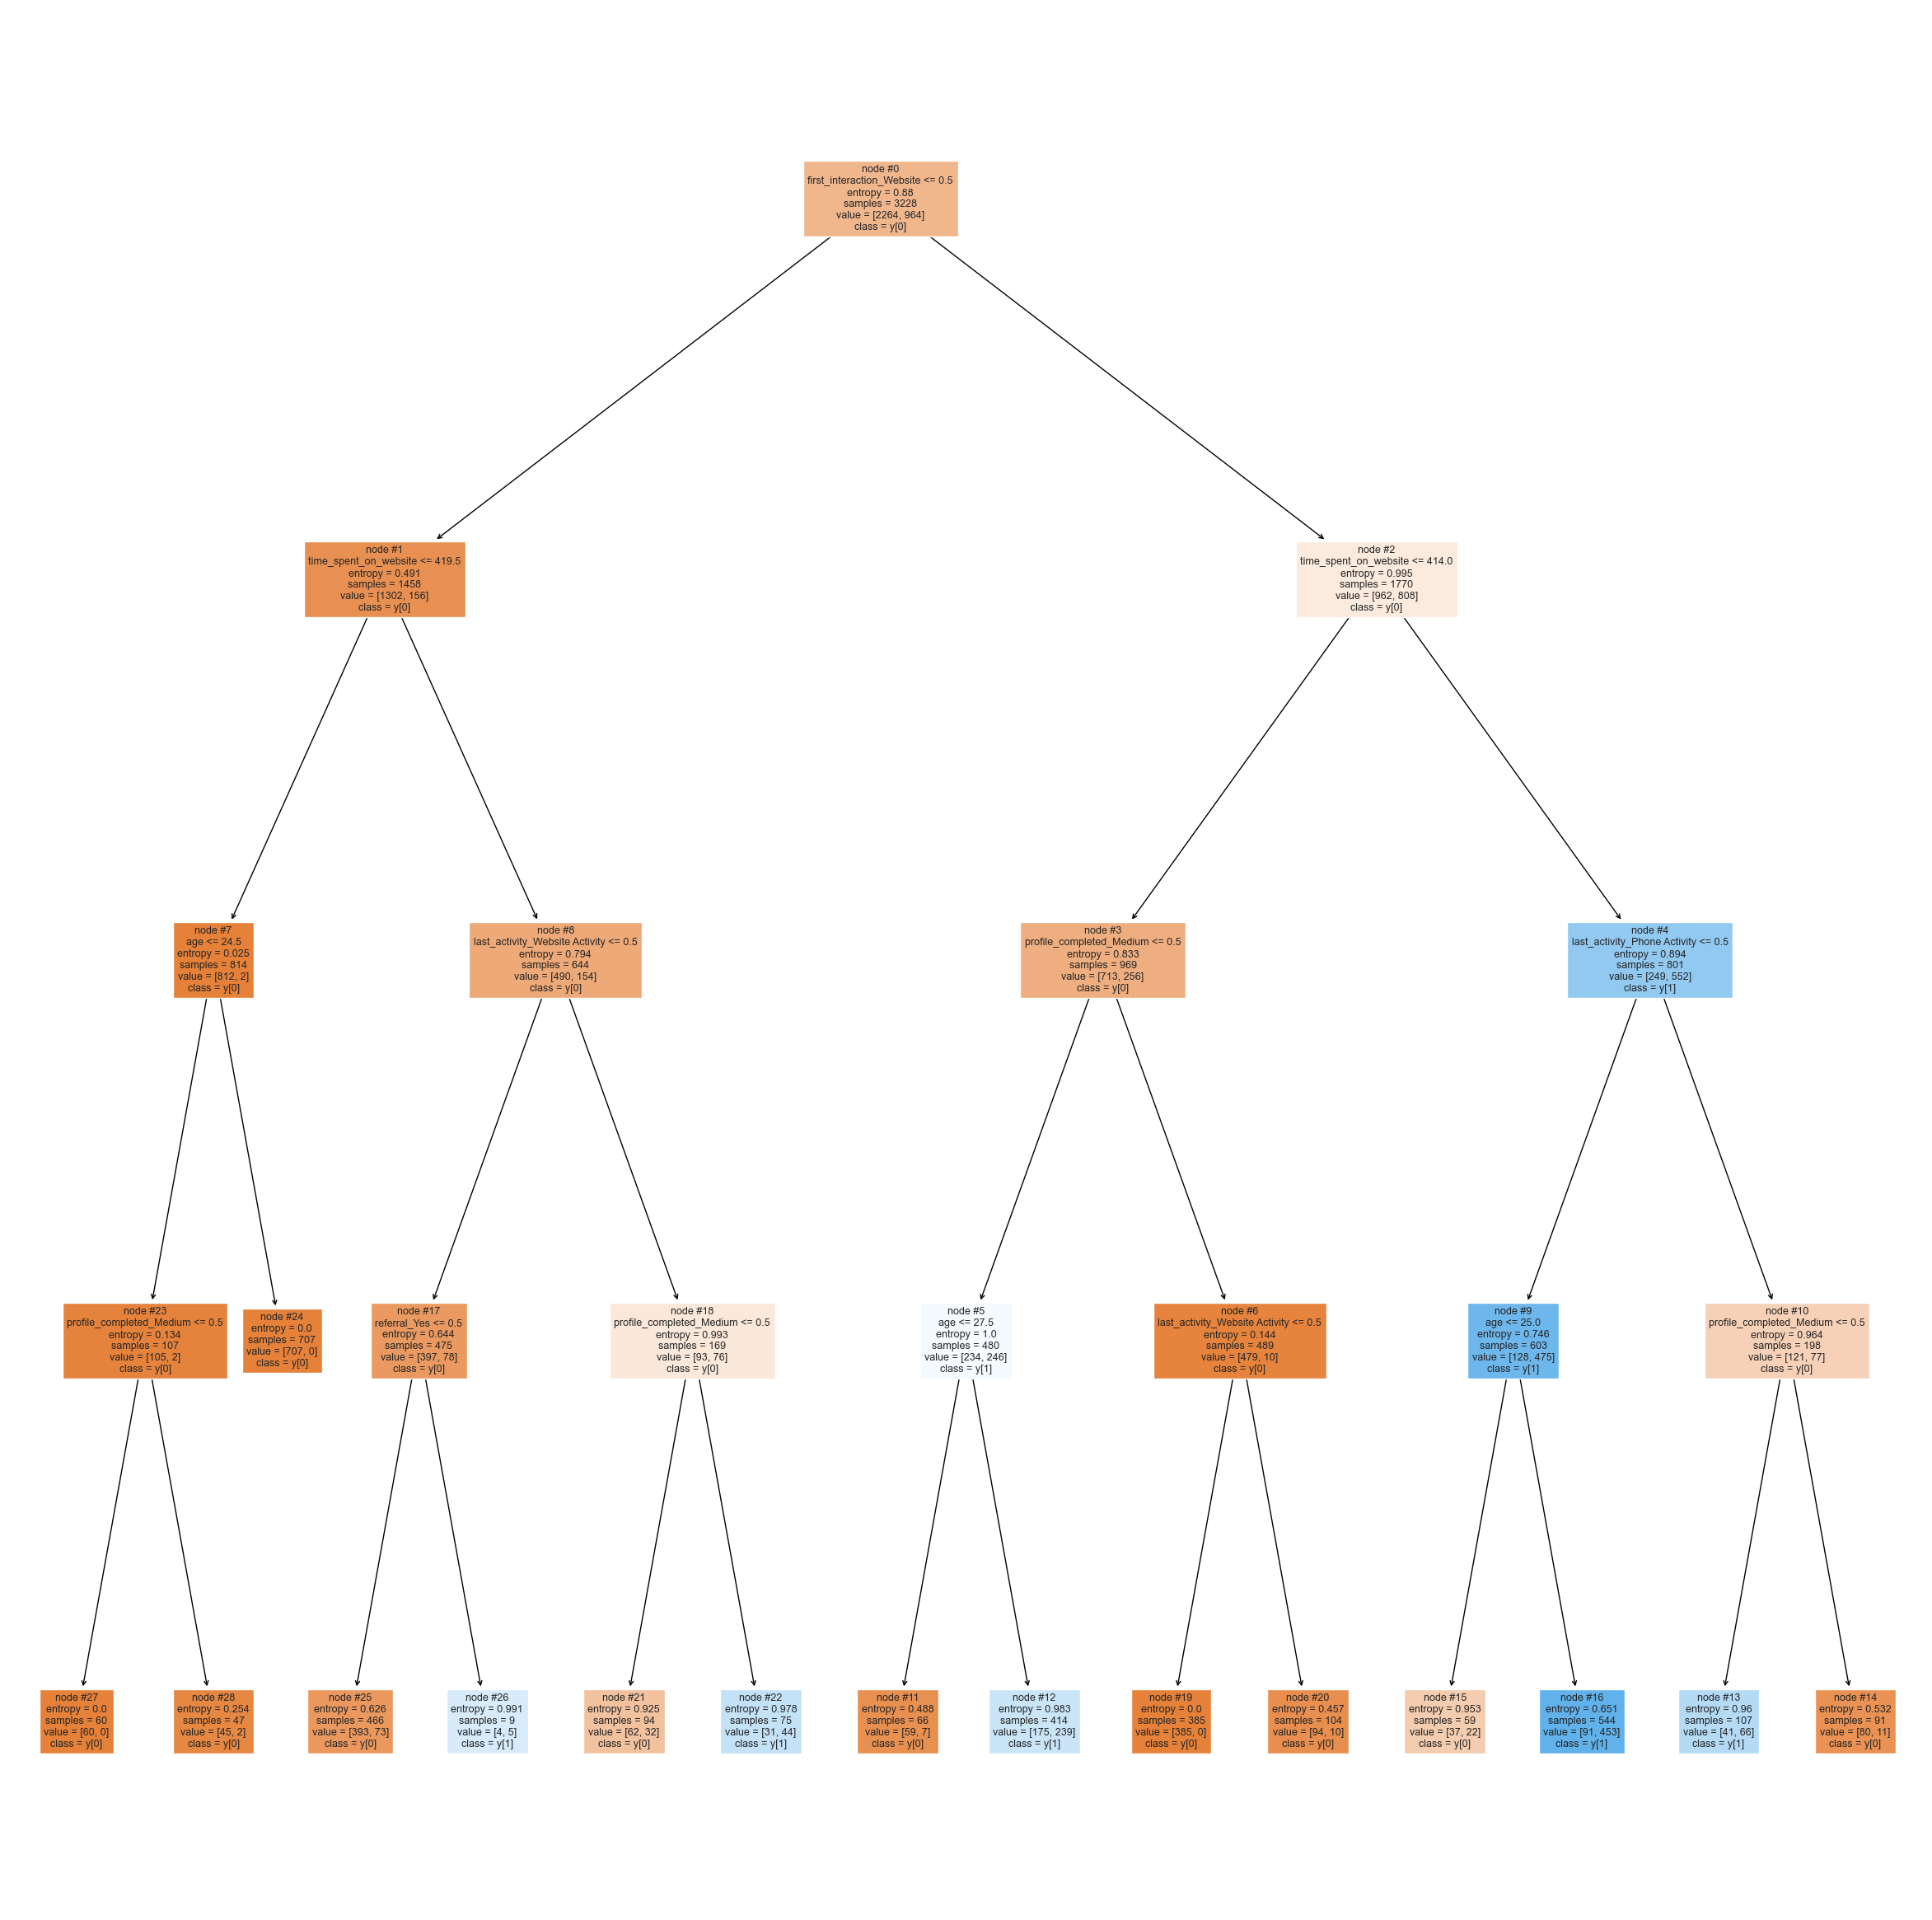

In [ ]:
feature_names = list(X_train.columns) # get feature names from train set

plt.figure(figsize=(30, 30))
out = tree.plot_tree(
    estimator,
    max_depth=5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Checking most important features

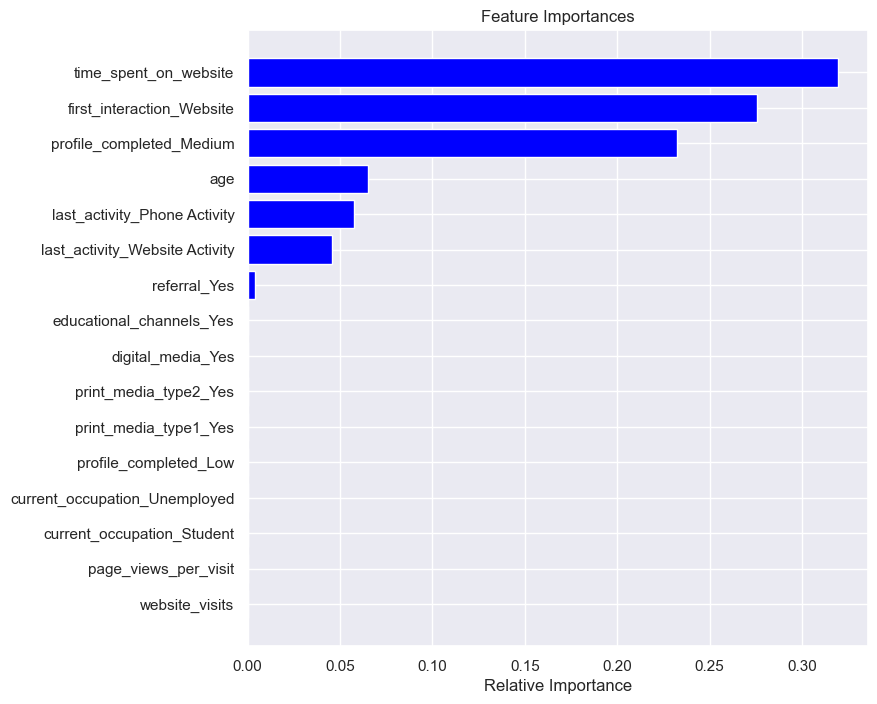

In [ ]:
importances = estimator.feature_importances_ # Getting most important features
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**OBSERVATIONS**

The most importante features are:

- Time_spent_on_website
- first_interaction_webstie
- profile_completed_medium

Those 3 features are the most significative importante. After them, is last_activity_phone_activity, age, current_occupation_student, last_activity_website activity and referral_yes. This last features are significant less impactful.

## Do we need to prune the tree?

As the model is not overfitting, we do not need to prune the tree.

## Building a Random Forest model

In [ ]:
rf = RandomForestClassifier( random_state = 1) # creating random forest model PUT CLASS WEIGHT HERE TO SEE IF IT HELPS!!!!!!!!!!!!!!!!

rf.fit(X_train, y_train) # Fitting model

RandomForestClassifier(random_state=1)

### Checking performance of Randome Forest model for training and test data

### Train set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



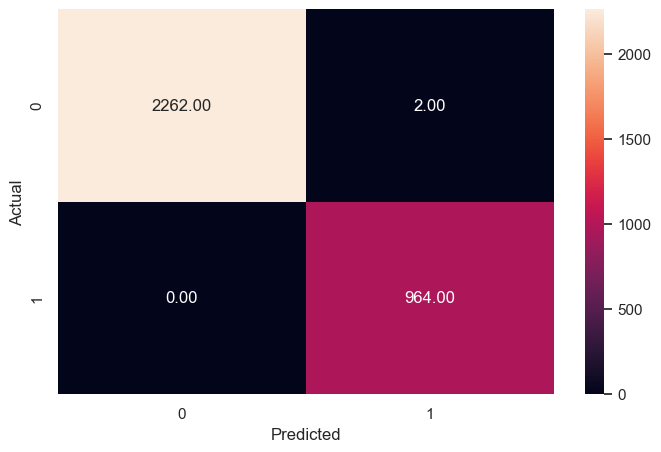

In [ ]:
y_pred_train_rf = rf.predict(X_train)
metrics_score(y_train, y_pred_train_rf) # Checking performance on train set

### Test set

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



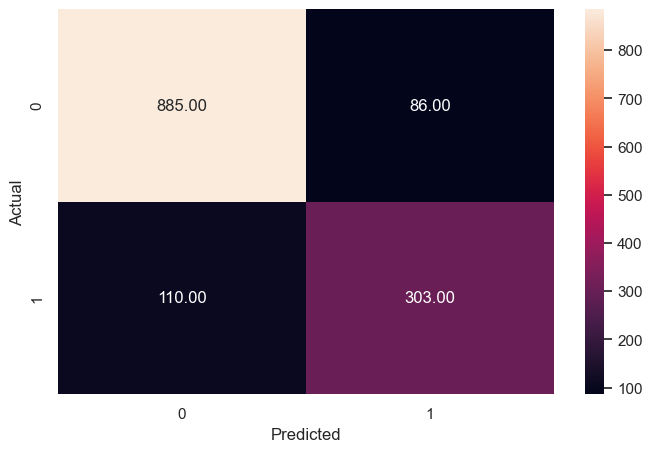

In [ ]:
y_pred_test_rf = rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf) # checking performance on test set

**OBSERVATIONS**

- The model is overfitting

### Hyperparameter tuning for Random Forest - GridSearchCV

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1) # creating tuned model

# parameters for gridsearchCV
parameters = {
    "max_depth": [6,10],
    "min_samples_leaf": [3,5],
    "min_samples_split": [2,5],
    "n_estimators": [120],
    "criterion": ['entropy'],
    "max_features": [0.7,0.9],
    "class_weight": [{0: 0.3, 1: 0.7}]
}

grid_obj = GridSearchCV(rf_tuned, param_grid = parameters, cv=4,scoring='recall',n_jobs=-1) # Run GridSearchCV and assign it to variable
grid_obj = grid_obj.fit(X_train, y_train)


rf_tuned = grid_obj.best_estimator_ # set tuned model with the best estimators


rf_tuned.fit(X_train, y_train) # Fitting tuned model

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.7, min_samples_leaf=5,
                       n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2264
           1       0.70      0.89      0.78       964

    accuracy                           0.85      3228
   macro avg       0.82      0.86      0.84      3228
weighted avg       0.87      0.85      0.86      3228



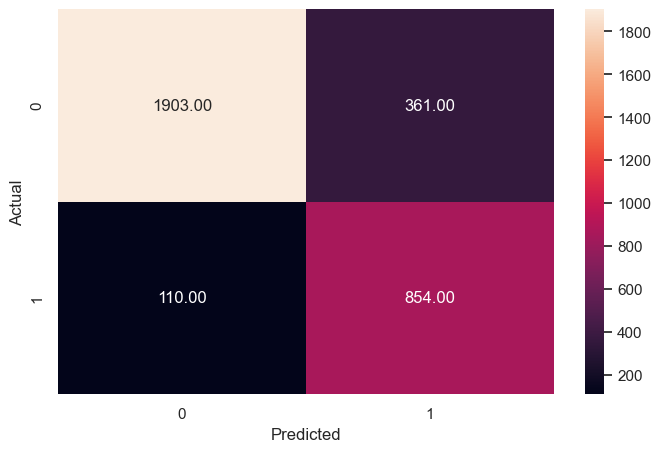

In [ ]:
y_pred_train_rf = rf_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       971
           1       0.67      0.84      0.75       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



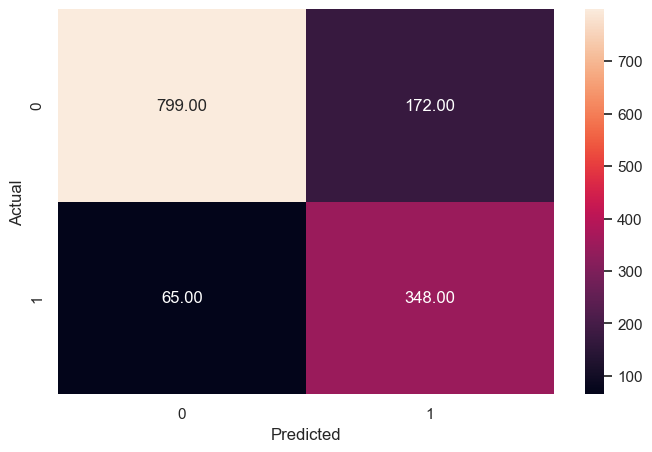

In [ ]:
y_pred_test_rf = rf_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**OBSERVATIONS**

- Model in test is really close to model on train set
- Random forest is the best model of all the rest
- Model is not overfitting after hyperparameter tuning

### Checking most important features

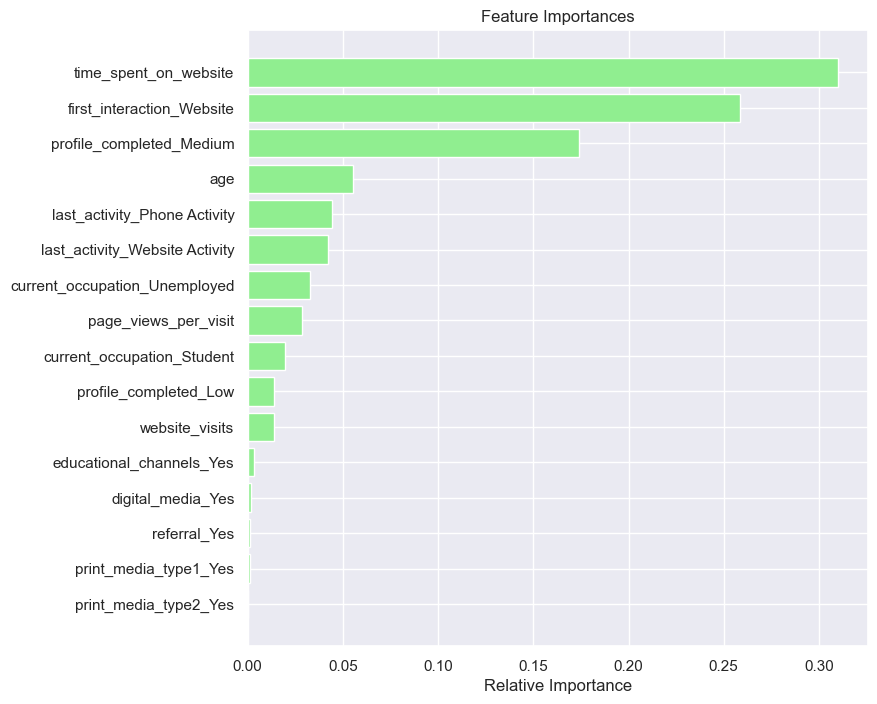

In [ ]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features are still time spent, first interaction and profile completed
- More features are also used

## Do we need to prune the tree?

No, we don't.

## Actionable Insights and Recommendations

**Insights:**

- Professionals are the most to become paid customers
- People who were referral have the biggest conversion rate
- Greater ages are the most in the data
- Leads whos first interaction was on the website, have a higher conversion rate
- Website interaction works the best compare to email and phone activity
- A lead being professional, having a high complete profile and their first interaction was website. Is most likely to become a paid customer

**RECOMENDATIONS:**

- Create or improve a better system for referral, as this feature has the biggest conversion rate.
- First interaction counts for website and mobile app are really close, but website first interaction have biggest conversion rate. Improving quality of mobile app experience may increase conversion rate
- Collecting a reason why a lead has sign up, may improve data analysis for better prediction